## Задача 1

Для неявного метода:

$u_{n+1}=u_n+Δt⋅λu_{n+1}$

$u_{n+1}=\frac{u_n}{1-\lambda\triangle t}$
​
 .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def explicit_euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

In [3]:
def implicit_euler_solve(lam, u0, T, dt):
    """Решает du/dt = lambda u на 0 < t < T с u(t=0) = u0 при помощи неявного метода Эйлера."""
    num_steps = int(T / dt)
    tt = np.linspace(0, T, num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = u0
    
    for n in range(num_steps):
        y[n+1] = y[n] / (1 - lam * dt)
    
    return tt, y

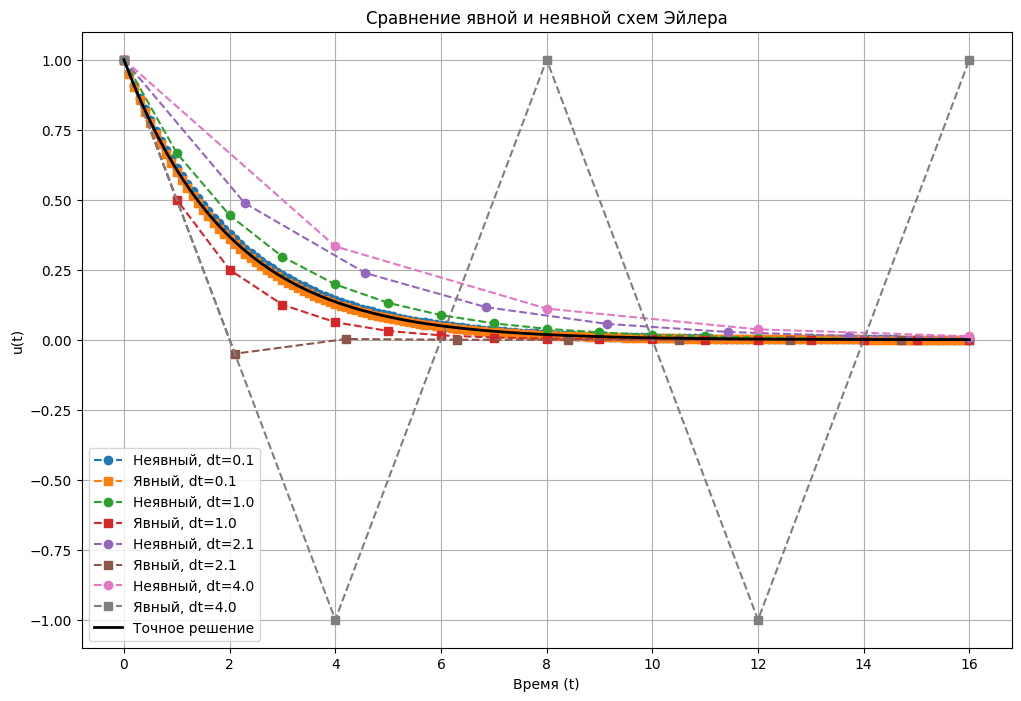

In [4]:
lam = -0.5
u0 = 1.0
T = 8 / abs(lam)

# Шаги интегрирования
dts = [0.1, 1.0, 2.1, 4.0]

plt.figure(figsize=(12, 8))

for dt in dts:
    tt_implicit, y_implicit = implicit_euler_solve(lam, u0, T, dt)
    tt_explicit, y_explicit = explicit_euler_solve(lam, u0, T, dt)
    
    plt.plot(tt_implicit, y_implicit, 'o--', label=f'Неявный, dt={dt}')
    plt.plot(tt_explicit, y_explicit, 's--', label=f'Явный, dt={dt}')

# Аналитическое решение
tt_analytical = np.linspace(0, T, 100)
y_analytical = np.exp(lam * tt_analytical)
plt.plot(tt_analytical, y_analytical, 'k-', lw=2, label='Точное решение')

plt.xlabel('Время (t)')
plt.ylabel('u(t)')
plt.title('Сравнение явной и неявной схем Эйлера')
plt.legend()
plt.grid(True)
plt.show()